## Praktikum 1

#### Langkah 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Langkah 2 - Load Data dan Visualisasi

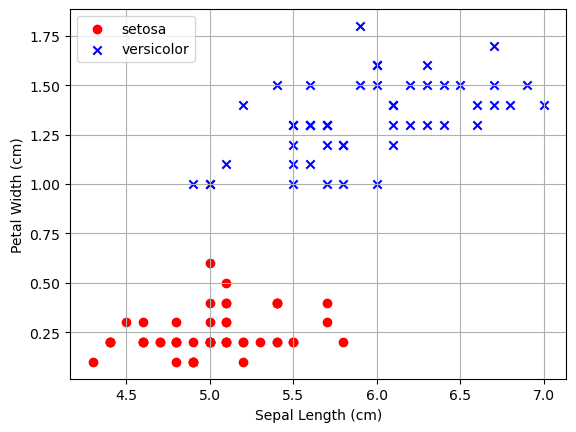

In [77]:
# Memuat dataset
df = pd.read_csv('../../Data/iris.csv', header=0)

# Memisahkan data berdasarkan spesies
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

# Menentukan kolom untuk sumbu x dan y
a, b = 'SepalLengthCm', 'PetalWidthCm'

# Membuat scatter plot
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')
# plt.scatter(virginica[a], virginica[b], color='green', marker='^', label='Virginica')

# Label untuk plot
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### Langkah 3 - Membuat Kelas Perceptron

In [65]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### Langkah 4 - Pilih Data dan Encoding Label

In [69]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 4]].values # slice data latih

#### Langkah 5 - Fitting Model

In [70]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

#### Langkah 6 - Visualisasi Nilai Error Per Epoch

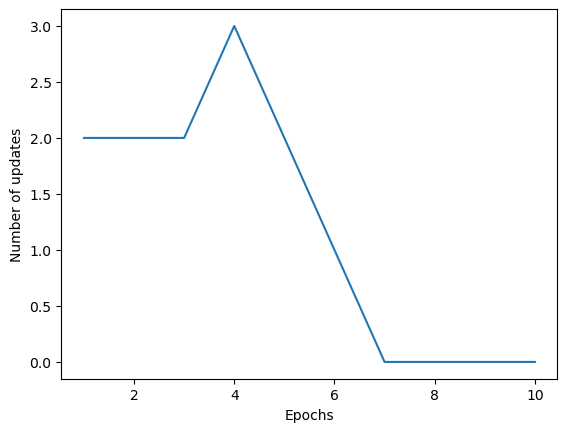

In [71]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#### Langkah 7 - Visualiasasi Decision Boundary

In [72]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_7684\3924338356.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


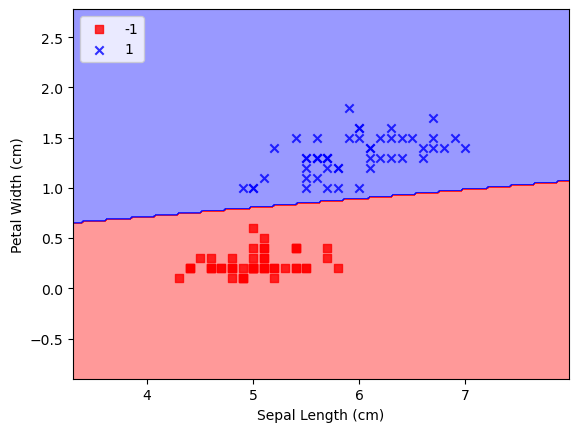

In [78]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')
plt.show()

## Praktikum 2

#### Langkah 1 - Import Library

In [100]:
from sklearn.datasets import fetch_20newsgroups  # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

#### Langkah 2 - Pilih Label dan Split Data

In [105]:
# Definisikan kategori yang ingin digunakan
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# Load data training dan testing
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Cek jumlah data yang di-load
print(f"Jumlah data training: {len(newsgroups_train.data)}")
print(f"Jumlah data testing: {len(newsgroups_test.data)}")

Jumlah data training: 1791
Jumlah data testing: 1192


#### Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [106]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



#### Penjelasan

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

## Praktikum 3

#### Langkah 1 - Import Library

In [107]:
from sklearn.neural_network import MLPClassifier

#### Langah 2 - Buat Data

In [108]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

#### Langkah 3 - Fit Model

In [109]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

#### Langkah 4 - Prediksi

In [110]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Praktikum 4
### Pra Pengolahan Data

#### Langkah 1 - Import Library

In [112]:
import numpy as np
import pandas as pd
import tensorflow as tf

#### Langkah 2 - Load Data

In [114]:
dataset = pd.read_csv('../../Data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


#### Langkah 3 - Encoding Data Kategorikal

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[1.0 0.0 0 ... 1 1 101348.88]
 [0.0 0.0 1 ... 0 1 112542.58]
 [1.0 0.0 0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0 ... 0 1 42085.58]
 [0.0 1.0 0 ... 1 0 92888.52]
 [1.0 0.0 0 ... 1 0 38190.78]]


#### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


#### Langkah 5 - Split Data

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Langkah 6 - Scaling Fitur

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Membuat Model ANN

#### Langkah 1 - Inisiasi Model ANN

In [119]:
ann = tf.keras.models.Sequential()

#### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [120]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### Langkah 3 - Membuat Hidden Layer Kedua

In [121]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### Langkah 4 - Membuat Output Layer

In [122]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training Model

#### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [123]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Langkah 2 - Fitting Model

In [124]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.3990 - loss: 0.7925
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.7892 - loss: 0.5301
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8106 - loss: 0.4487
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8092 - loss: 0.4370
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8209 - loss: 0.4242
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.8185 - loss: 0.4239
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.8216 - loss: 0.4132
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8246 - loss: 0.3978
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.8309 - loss: 0.3912
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8345 - loss: 0.3832
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8474 - loss: 0.3676
Epoch 12/100
250/25

#### Membuat Prediksi

Diberikan informasi sebagai berikut,

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

#### Modelkan Data Baru dan Buat Prediksi


In [125]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[False]]


#### Prediksi Dengan Data Testing

In [126]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Cek Akurasi dan Confusion Matrix

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1516   79]
 [ 195  210]]

Accuracy Score: 0.863
